In [19]:
import nmp_util
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [20]:
data = pd.read_csv('SeaLevel_exclGIA.txt', names = ['date [y]','rise [mm]'], delimiter = r'\s+')
display(data)

,date [y],rise [mm]
0,1993.011526,-37.91
1,1993.038692,-40.95
2,1993.065858,-41.09
3,1993.093025,-43.38
4,1993.120191,-38.66
...,...,...
1173,2024.882992,70.97
1174,2024.910084,67.60
1175,2024.937176,65.14
1176,2024.964267,66.41


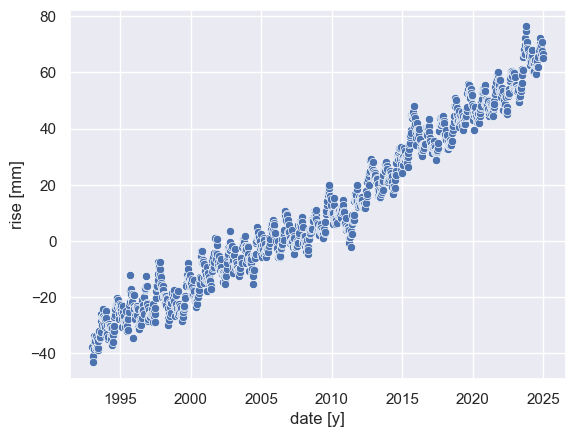

datapoints : 1178


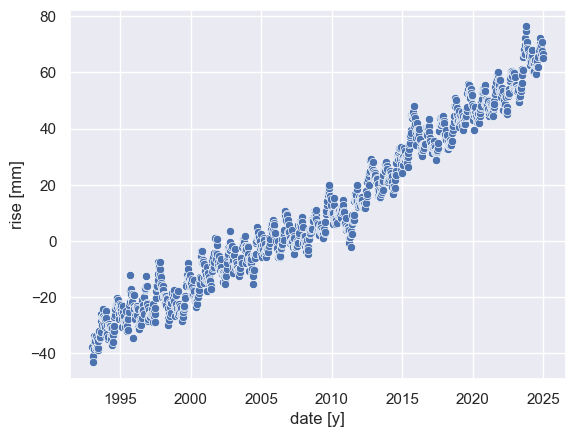

datapoings: 1178


In [21]:
sns.scatterplot(data = data, x = 'date [y]', y = 'rise [mm]')
plt.show()
print(f'datapoints : {len(data)}')
data = data.loc[nmp_util.get_inliers(data['rise [mm]']) & nmp_util.get_inliers(data['date [y]'])]
sns.scatterplot(data = data, x = 'date [y]', y = 'rise [mm]')
plt.show()
print(f'datapoings: {len(data)}')

LinearModelResult(parameters = 
[11.13990662]
m_0 = 29.023724612643935)
 normal_matrix =
 [[1178.]]

mean : 2009.0042768022072
standard deviation : 29.023724612643935


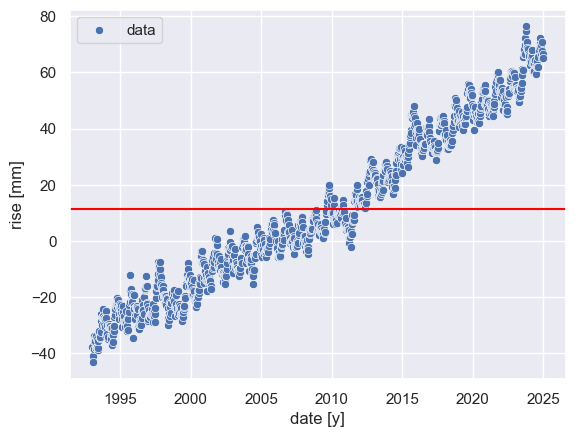

In [22]:
zero_order_fit = nmp_util.poly_fit(data['date [y]'], data['rise [mm]'], 0)
sns.scatterplot(data = data, x='date [y]', y='rise [mm]', label = 'data')
plt.axhline(zero_order_fit.parameters[0], color = 'red', label = 'zero order fit')

offset = zero_order_fit.parameters[0]

display(zero_order_fit)

print(f'mean : {data["date [y]"].mean()}')
print(f'standard deviation : {data["rise [mm]"].std()}')
plt.show()

LinearModelResult(parameters = 
[ 3.07378503e+00 -6.16410737e+03]
m_0 = 5.871333313179548)
 normal_matrix =
 [[4.75462431e+09 2.36660704e+06]
 [2.36660704e+06 1.17800000e+03]]

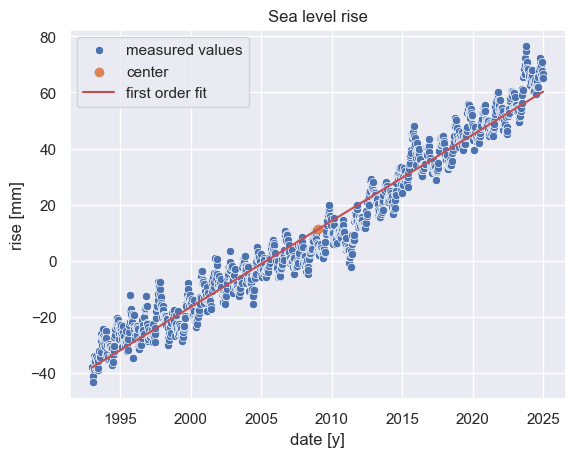

In [23]:
first_order_fit = nmp_util.poly_fit(data['date [y]'], data['rise [mm]'], 1)

display(first_order_fit)

x_center = data['date [y]'].mean()
y_center = data['rise [mm]'].mean()

data['linear fit [mm]'] = np.polyval(first_order_fit.parameters, data['date [y]'])
plt.title('Sea level rise')
sns.scatterplot(data, x = 'date [y]', y = 'rise [mm]', label = 'measured values')
plt.scatter(x_center, y_center, label = 'center')
sns.lineplot(data, x = 'date [y]', y = 'linear fit [mm]', c = 'r', label = 'first order fit')
plt.show()


y_pred = np.polyval(first_order_fit.parameters, x_center)
assert np.isclose(y_pred, y_center)

LinearModelResult(parameters = 
[  3.07378503 -38.01837141]
m_0 = 5.871333313179557)
 normal_matrix =
 [[401942.76188969  18839.460445  ]
 [ 18839.460445     1178.        ]]

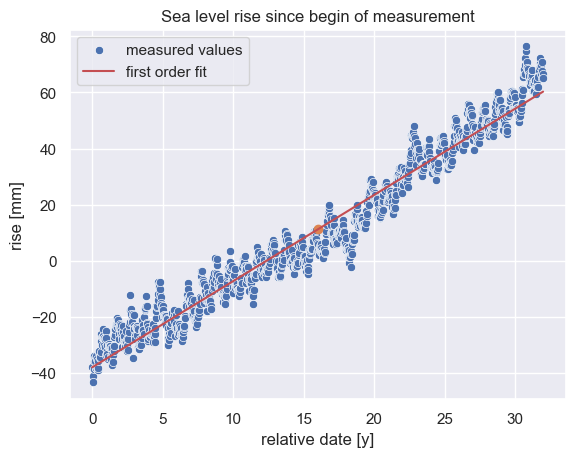

In [24]:
data['relative date [y]'] = data['date [y]'] - data['date [y]'].min()

first_order_fit = nmp_util.poly_fit(data['relative date [y]'], data['rise [mm]'], 1)

display(first_order_fit)

x_center = data['relative date [y]'].mean()
y_center = data['rise [mm]'].mean()

data['linear fit [mm]'] = np.polyval(first_order_fit.parameters, data['relative date [y]'])
plt.title('Sea level rise since begin of measurement')
sns.scatterplot(data, x = 'relative date [y]', y = 'rise [mm]', label = 'measured values')
sns.lineplot(data, x = 'relative date [y]', y = 'linear fit [mm]', c = 'r', label = 'first order fit')
plt.scatter(x_center, y_center, label = 'center')
plt.show()

y_pred = np.polyval(first_order_fit.parameters, x_center)
assert np.isclose(y_pred, y_center)

LinearModelResult(parameters = 
[ 6.24480616e-04  8.56100499e-03  2.22502984e+00 -3.24795334e+01]
m_0 = 5.06953448925332)
 normal_matrix =
 [[1.80583577e+11 6.58465473e+09 2.46949365e+08 9.64690435e+06]
 [6.58465473e+09 2.46949365e+08 9.64690435e+06 4.01942762e+05]
 [2.46949365e+08 9.64690435e+06 4.01942762e+05 1.88394604e+04]
 [9.64690435e+06 4.01942762e+05 1.88394604e+04 1.17800000e+03]]

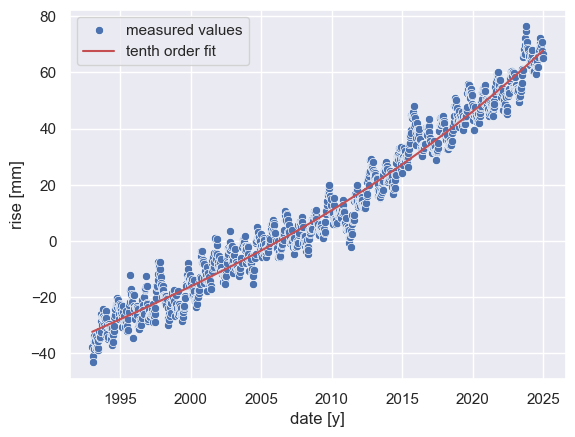

In [25]:
poly_fit = nmp_util.poly_fit(data['relative date [y]'], data['rise [mm]'], 3)

display(poly_fit)

data['poly fit [mm]'] = np.polyval(poly_fit.parameters, data['relative date [y]'])

sns.scatterplot(data, x = 'date [y]', y = 'rise [mm]', label = 'measured values')
sns.lineplot(data, x = 'date [y]', y = 'poly fit [mm]', c = 'r', label = 'tenth order fit')
plt.show()

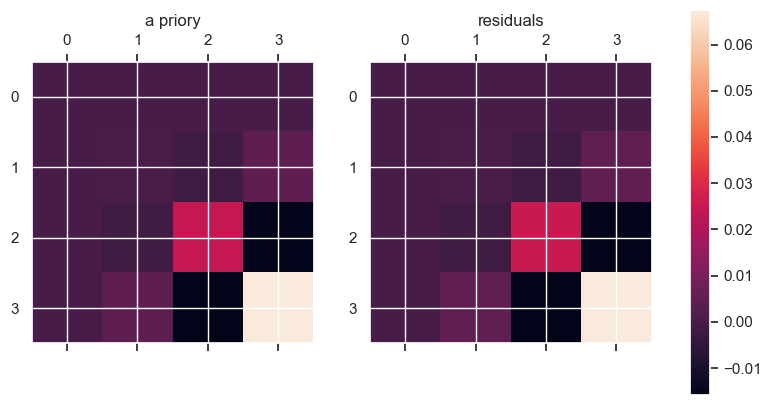

array([[ 5.52299546e-08, -2.64973373e-06,  3.38873487e-05, -9.01325639e-05],
       [-2.64973373e-06,  1.30764790e-04, -1.74220458e-03,  4.94394005e-03],
       [ 3.38873487e-05, -1.74220458e-03,  2.47634625e-02, -7.90931762e-02],
       [-9.01325639e-05,  4.94394005e-03, -7.90931762e-02,  3.37344712e-01]])

array([[ 5.67767908e-08, -2.72394535e-06,  3.48364383e-05, -9.26569245e-05],
       [-2.72394535e-06,  1.34427145e-04, -1.79099885e-03,  5.08240595e-03],
       [ 3.48364383e-05, -1.79099885e-03,  2.54570177e-02, -8.13083544e-02],
       [-9.26569245e-05,  5.08240595e-03, -8.13083544e-02,  3.46792792e-01]])

In [26]:
sigma_0 = 5 # mm   This is just a guess, how do i determine sigma_0 in this case ?

cofactor_matrix = poly_fit.cofactor_matrix
vmin = np.min(cofactor_matrix)*sigma_0
vmax = np.max(cofactor_matrix)*sigma_0


plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('a priory')
im = ax1.matshow(cofactor_matrix * sigma_0**2, vmin = vmin, vmax = vmax)
ax2 = plt.subplot(1,2,2)
ax2.set_title('residuals')
ax2.matshow(cofactor_matrix * poly_fit.rse**2, vmin = vmin, vmax = vmax)
plt.colorbar(im, ax=[ax1, ax2])
plt.show()

display(cofactor_matrix*sigma_0**2)
display(cofactor_matrix*poly_fit.rse**2)


# Let's compare the explicit and implicit methods

In [27]:
np.random.seed(1)
x = np.random.random(1000)
y = np.random.random(1000)
degree = 7
direct_polyfit =    nmp_util.poly_fit(x,y,degree, method='direct')
via_design_matrix = nmp_util.poly_fit(x,y,degree, method='design matrix')

assert np.allclose(direct_polyfit.parameters, via_design_matrix.parameters), 'The two methods are not equivalent!'
assert np.allclose(direct_polyfit.normal_matrix, via_design_matrix.normal_matrix), 'The two methods are not equivalent!'
print('The two methods are equivalent!')

The two methods are equivalent!


In [28]:
N = 500_000
test_x = np.random.rand(N)
test_y = np.random.rand(N)
order = 10

In [29]:
%timeit nmp_util.poly_fit(test_x, test_y, degree, method = 'design matrix')
%timeit nmp_util.poly_fit(test_x, test_y, degree, method = 'direct')

144 ms ± 16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
418 ms ± 54.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
